In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.e+-]+)",

        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.e+-]+)",

        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.e+-]+)",

        "Painter_Knapsack_combined_efficiency": r"Painter\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_Painter_Knapsack_Combined_time": r"Final painter\+Knapsack_Combined time:\s+([\d.e+-]+)",

        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.e+-]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['../output/run_250/4_4_output_best.txt', '../output/run_250/4_8_output_best.txt', '../output/run_250/4_16_output_best.txt',
              '../output/run_250/8_4_output_best.txt', '../output/run_250/8_8_output_best.txt', '../output/run_250/8_16_output_best.txt',
              '../output/run_250/16_4_output_best.txt', '../output/run_250/16_8_output_best.txt', '../output/run_250/16_16_output_best.txt',
              '../output/run_250/32_4_output_best.txt', '../output/run_250/32_8_output_best.txt', '../output/run_250/32_16_output_best.txt',
              '../output/run_250/64_4_output_best.txt', '../output/run_250/64_8_output_best.txt', '../output/run_250/64_16_output_best.txt',
              '../output/run_250/128_4_output_best.txt', '../output/run_250/128_8_output_best.txt', '../output/run_250/128_16_output_best.txt',
              '../output/run_250/256_4_output_best.txt', '../output/run_250/256_8_output_best.txt', '../output/run_250/256_16_output_best.txt',
              '../output/run_250/512_4_output_best.txt','../output/run_250/512_8_output_best.txt','../output/run_250/512_16_output_best.txt']
            #   '../output/run_250/1024_4_output_best.txt','../output/run_250/1024_8_output_best.txt','../output/run_250/1024_16_output_best.txt']
    




result_df = consolidate_data_from_files(file_paths)




In [3]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.999699             0.002213             0.800846   
1       2                  0.999849             0.001715             0.800966   
2       3                  0.999815             0.001574             0.998951   
3       4                  0.999966             0.001513             0.800997   
4       5                  0.999647             0.001676             0.800558   
...   ...                       ...                  ...                  ...   
5995  246                  0.999953             0.149820             0.941316   
5996  247                  0.999951             0.148791             0.941426   
5997  248                  0.999954             0.157283             0.941300   
5998  249                  0.999954             0.150513             0.941222   
5999  250                  0.999955             0.145966             0.941382   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001995                         0.998525                0.000217   
1           0.001358                         0.999506                0.000156   
2           0.001308                         0.998951                0.000154   
3           0.001263                         0.998781                0.000143   
4           0.001256                         0.997998                0.000159   
...              ...                              ...                     ...   
5995        0.071303                         0.997952                0.174127   
5996        0.078829                         0.998195                0.173718   
5997        0.076458                         0.998070                0.173495   
5998        0.073468                         0.998261                0.173497   
5999        0.075184                         0.998174                0.174288   

      Painter_Knapsack_combined_efficiency  \
0                                 0.999699   
1                                 0.999849   
2                                 0.999815   
3                                 0.999966   
4                                 0.999647   
...                                    ...   
5995                              0.999102   
5996                              0.999073   
5997                              0.999242   
5998                              0.999103   
5999                              0.999307   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.001122                          0.999699   
1                                 0.001042                          0.999849   
2                                 0.000907                          0.999815   
3                                 0.000824                          0.999966   
4                                 0.000874                          0.999647   
...                                    ...                               ...   
5995                              0.206005                          0.941684   
5996                              0.209366                          0.941571   
5997                              0.211695                          0.941485   
5998                              0.206172                          0.941545   
5999                              0.205723                          0.941692   

      Final_SFC_Knapsack_Combined_time  \
0                             0.001113   
1                             0.001045   
2                             0.000894   
3                             0.000793   
4                             0.000851   
...                                ...   
5995                          0.040893   
5996                          0.040210   
5997                          0.041098   
5998                          0.041067   
5999                          0.041083   

                                         

In [4]:
result_df.head(10)

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0    1                  0.999699             0.002213             0.800846   
1    2                  0.999849             0.001715             0.800966   
2    3                  0.999815             0.001574             0.998951   
3    4                  0.999966             0.001513             0.800997   
4    5                  0.999647             0.001676             0.800558   
5    6                  0.999979             0.001710             0.800573   
6    7                  0.999872             0.001714             0.800805   
7    8                  0.999924             0.001585             0.801319   
8    9                  0.999981             0.001671             0.801167   
9   10                  0.999897             0.001667             0.800402   

   Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0        0.001995                         0.998525                0.000217   
1        0.001358                         0.999506                0.000156   
2        0.001308                         0.998951                0.000154   
3        0.001263                         0.998781                0.000143   
4        0.001256                         0.997998                0.000159   
5        0.001267                         0.999661                0.000134   
6        0.001361                         0.997792                0.000163   
7        0.001391                         0.997715                0.000150   
8        0.001466                         0.998989                0.000137   
9        0.001340                         0.999234                0.000221   

   Painter_Knapsack_combined_efficiency  Final_Painter_Knapsack_Combined_time  \
0                              0.999699                              0.001122   
1                              0.999849                              0.001042   
2                              0.999815                              0.000907   
3                              0.999966                              0.000824   
4                              0.999647                              0.000874   
5                              0.999979                              0.001102   
6                              0.999872                              0.000961   
7                              0.999924                              0.000884   
8                              0.999981                              0.000980   
9                              0.999897                              0.000902   

   SFC_Knapsack_combined_efficiency  Final_SFC_Knapsack_Combined_time  \
0                          0.999699                          0.001113   
1                          0.999849                          0.001045   
2                          0.999815                          0.000894   
3                          0.999966                          0.000793   
4                          0.999647                          0.000851   
5                          0.999979                          0.001214   
6                          0.999872                          0.000914   
7                          0.999924                          0.001277   
8                          0.999981                          0.000860   
9                          0.999897                          0.000914   

                                    File  
0  ../output/run_250/4_4_output_best.txt  
1  ../output/run_250/4_4_output_best.txt  
2  ../output/run_250/4_4_output_best.txt  
3  ../output/run_250/4_4_output_best.txt  
4  ../output/run_250/4_4_output_best.txt  
5  ../output/run_250/4_4_output_best.txt  
6  ../output/run_250/4_4_output_best.txt  
7  ../output/run_250/4_4_output_best.txt  
8  ../output/run_250/4_4_output_best.txt  
9  ../output/run_250/4_4_output_best.txt

In [5]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [7]:
result_df

Run  Only_KNAPSACK_efficiency  Final_Knapsack_time  Only_SFC_efficiency  \
0       1                  0.999699             0.002213             0.800846   
1       2                  0.999849             0.001715             0.800966   
2       3                  0.999815             0.001574             0.998951   
3       4                  0.999966             0.001513             0.800997   
4       5                  0.999647             0.001676             0.800558   
...   ...                       ...                  ...                  ...   
5995  246                  0.999953             0.149820             0.941316   
5996  247                  0.999951             0.148791             0.941426   
5997  248                  0.999954             0.157283             0.941300   
5998  249                  0.999954             0.150513             0.941222   
5999  250                  0.999955             0.145966             0.941382   

      Final_SFC_time  SFC_painterPartition_efficiency  Final_SFC_Painter_time  \
0           0.001995                         0.998525                0.000217   
1           0.001358                         0.999506                0.000156   
2           0.001308                         0.998951                0.000154   
3           0.001263                         0.998781                0.000143   
4           0.001256                         0.997998                0.000159   
...              ...                              ...                     ...   
5995        0.071303                         0.997952                0.174127   
5996        0.078829                         0.998195                0.173718   
5997        0.076458                         0.998070                0.173495   
5998        0.073468                         0.998261                0.173497   
5999        0.075184                         0.998174                0.174288   

      Painter_Knapsack_combined_efficiency  \
0                                 0.999699   
1                                 0.999849   
2                                 0.999815   
3                                 0.999966   
4                                 0.999647   
...                                    ...   
5995                              0.999102   
5996                              0.999073   
5997                              0.999242   
5998                              0.999103   
5999                              0.999307   

      Final_Painter_Knapsack_Combined_time  SFC_Knapsack_combined_efficiency  \
0                                 0.001122                          0.999699   
1                                 0.001042                          0.999849   
2                                 0.000907                          0.999815   
3                                 0.000824                          0.999966   
4                                 0.000874                          0.999647   
...                                    ...                               ...   
5995                              0.206005                          0.941684   
5996                              0.209366                          0.941571   
5997                              0.211695                          0.941485   
5998                              0.206172                          0.941545   
5999                              0.205723                          0.941692   

      Final_SFC_Knapsack_Combined_time                File  
0                             0.001113     4_4_Output_Best  
1                             0.001045     4_4_Output_Best  
2                             0.000894     4_4_Output_Best  
3                             0.000793     4_4_Output_Best  
4                             0.000851     4_4_Output_Best  
...                                ...                 ...  
5995                          0.040893  512_16_Output_Best  
5996                          0.040210  512_16_Output_Best

In [8]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','Painter_Knapsack_combined_efficiency':'Painter_Knapsack_Combined_Efficiency','Final_Painter_Knapsack_Combined_time':'Painter_Knapsack_Combined_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [9]:
result_df

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0       1                  0.999699                  0.002213   
1       2                  0.999849                  0.001715   
2       3                  0.999815                  0.001574   
3       4                  0.999966                  0.001513   
4       5                  0.999647                  0.001676   
...   ...                       ...                       ...   
5995  246                  0.999953                  0.149820   
5996  247                  0.999951                  0.148791   
5997  248                  0.999954                  0.157283   
5998  249                  0.999954                  0.150513   
5999  250                  0.999955                  0.145966   

      Only_SFC_Efficiency  Only_SFC_Final_Time  \
0                0.800846             0.001995   
1                0.800966             0.001358   
2                0.998951             0.001308   
3                0.800997             0.001263   
4                0.800558             0.001256   
...                   ...                  ...   
5995             0.941316             0.071303   
5996             0.941426             0.078829   
5997             0.941300             0.076458   
5998             0.941222             0.073468   
5999             0.941382             0.075184   

      SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                            0.998525                         0.000217   
1                            0.999506                         0.000156   
2                            0.998951                         0.000154   
3                            0.998781                         0.000143   
4                            0.997998                         0.000159   
...                               ...                              ...   
5995                         0.997952                         0.174127   
5996                         0.998195                         0.173718   
5997                         0.998070                         0.173495   
5998                         0.998261                         0.173497   
5999                         0.998174                         0.174288   

      Painter_Knapsack_Combined_Efficiency  \
0                                 0.999699   
1                                 0.999849   
2                                 0.999815   
3                                 0.999966   
4                                 0.999647   
...                                    ...   
5995                              0.999102   
5996                              0.999073   
5997                              0.999242   
5998                              0.999103   
5999                              0.999307   

      Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                 0.001122                          0.999699   
1                                 0.001042                          0.999849   
2                                 0.000907                          0.999815   
3                                 0.000824                          0.999966   
4                                 0.000874                          0.999647   
...                                    ...                               ...   
5995                              0.206005                          0.941684   
5996                              0.209366                          0.941571   
5997                              0.211695                          0.941485   
5998                              0.206172                          0.941545   
5999                              0.205723                          0.941692   

      SFC_Knapsack_Combined_Final_Time                File  
0                             0.001113     4_4_Output_Best  
1                             0.001045     4_4_Output_Best  
2                             0.000894

In [10]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [11]:
print(column_list)

[0.9996985207, 0.9998494586, 0.9998145386, 0.9999656384, 0.9996470618, 0.9999790695, 0.9998722245, 0.9999243353, 0.999981298, 0.9998974371, 0.9999260946, 0.9999162141, 0.9999094188, 0.999746271, 0.999833329, 0.9999689492, 0.9999397652, 0.9998520976, 0.9994911292, 0.9996338566, 0.9997919832, 0.9997534785, 0.9999079502, 0.9998593674, 0.9996779597, 0.9996444827, 0.9998088843, 0.9997179607, 0.9996189521, 0.9997254043, 0.9999671832, 0.9998666601, 0.9998924487, 0.9994582889, 0.9997161334, 0.9996043587, 0.9997845811, 0.999659243, 0.9996313872, 0.9997537823, 0.999936869, 0.9999097667, 0.9995872981, 0.9996576428, 0.9999252496, 0.9996098819, 0.9999516777, 0.9997404998, 0.9998021035, 0.99970743, 0.9998326202, 0.9997334809, 0.9996432144, 0.9997138261, 0.9998233986, 0.9995088927, 0.9994810642, 0.999840722, 0.9999100741, 0.9998687918, 0.9997630668, 0.9998986423, 0.999651355, 0.9997953935, 0.9999224691, 0.9998761677, 0.9998910628, 0.9997816626, 0.9998049733, 0.9998682541, 0.9996255794, 0.9998317072, 

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [13]:
filename = '4_4_Output_Best'
df_1 = result_df[result_df['File'] == filename]

In [14]:
df_1

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
0      1                  0.999699                  0.002213   
1      2                  0.999849                  0.001715   
2      3                  0.999815                  0.001574   
3      4                  0.999966                  0.001513   
4      5                  0.999647                  0.001676   
..   ...                       ...                       ...   
245  246                  0.999904                  0.001547   
246  247                  0.999664                  0.001811   
247  248                  0.999904                  0.001553   
248  249                  0.999661                  0.001960   
249  250                  0.999698                  0.001528   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
0               0.800846             0.001995   
1               0.800966             0.001358   
2               0.998951             0.001308   
3               0.800997             0.001263   
4               0.800558             0.001256   
..                   ...                  ...   
245             0.800524             0.001370   
246             0.799736             0.001544   
247             0.799991             0.001323   
248             0.998561             0.001310   
249             0.799738             0.001210   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
0                           0.998525                         0.000217   
1                           0.999506                         0.000156   
2                           0.998951                         0.000154   
3                           0.998781                         0.000143   
4                           0.997998                         0.000159   
..                               ...                              ...   
245                         0.999673                         0.000165   
246                         0.999657                         0.000169   
247                         0.999543                         0.000139   
248                         0.998561                         0.000143   
249                         0.998670                         0.000142   

     Painter_Knapsack_Combined_Efficiency  \
0                                0.999699   
1                                0.999849   
2                                0.999815   
3                                0.999966   
4                                0.999647   
..                                    ...   
245                              0.999904   
246                              0.999664   
247                              0.999904   
248                              0.999661   
249                              0.999698   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
0                                0.001122                          0.999699   
1                                0.001042                          0.999849   
2                                0.000907                          0.999815   
3                                0.000824                          0.999966   
4                                0.000874                          0.999647   
..                                    ...                               ...   
245                              0.000850                          0.999904   
246                              0.001075                          0.999664   
247                              0.000854                          0.999904   
248                              0.001061                          0.999661   
249                              0.000887                          0.999698   

     SFC_Knapsack_Combined_Final_Time             File  
0                            0.001113  4_4_Output_Best  
1                            0.001045  4_4_Output_Best  
2                            0.000894  4_4_Output_Best  
3                            0.000793  4_4_Output_Be

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [17]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_1592597/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [18]:
specific_group = grouped.get_group('4_8_Output_Best')
specific_group

Run  Only_Knapsack_Efficiency  Only_Knapsack_Final_Time  \
250    1                  0.999905                  0.001613   
251    2                  0.999845                  0.001546   
252    3                  0.999961                  0.001547   
253    4                  0.999925                  0.001671   
254    5                  0.999882                  0.001531   
..   ...                       ...                       ...   
495  246                  0.999906                  0.001461   
496  247                  0.999961                  0.001459   
497  248                  0.999902                  0.001465   
498  249                  0.999755                  0.001454   
499  250                  0.999889                  0.001613   

     Only_SFC_Efficiency  Only_SFC_Final_Time  \
250             0.999598             0.001370   
251             0.889341             0.001380   
252             0.889281             0.001435   
253             0.888796             0.001406   
254             0.890323             0.001443   
..                   ...                  ...   
495             0.888978             0.001236   
496             0.889342             0.001210   
497             0.889001             0.001202   
498             0.891187             0.001188   
499             0.889962             0.001202   

     SFC_PainterPartition_Efficiency  SFC_PainterPartition_Final_Time  \
250                         0.999598                         0.000177   
251                         0.999837                         0.000150   
252                         0.998971                         0.000141   
253                         0.999217                         0.000388   
254                         0.998564                         0.000131   
..                               ...                              ...   
495                         0.999314                         0.000142   
496                         0.999514                         0.000142   
497                         0.998648                         0.000136   
498                         0.998919                         0.000134   
499                         0.998663                         0.000138   

     Painter_Knapsack_Combined_Efficiency  \
250                              0.999905   
251                              0.999845   
252                              0.999961   
253                              0.999925   
254                              0.999882   
..                                    ...   
495                              0.999906   
496                              0.999961   
497                              0.999902   
498                              0.999755   
499                              0.999889   

     Painter_Knapsack_Combined_Final_Time  SFC_Knapsack_Combined_Efficiency  \
250                              0.000883                          0.999905   
251                              0.000920                          0.999845   
252                              0.000879                          0.999961   
253                              0.000952                          0.999925   
254                              0.000894                          0.999882   
..                                    ...                               ...   
495                              0.000784                          0.999906   
496                              0.000812                          0.999961   
497                              0.000788                          0.999902   
498                              0.000817                          0.999755   
499                              0.000879                          0.999889   

     SFC_Knapsack_Combined_Final_Time             File  
250                          0.000897  4_8_Output_Best  
251                          0.001112  4_8_Output_Best  
252                          0.000915  4_8_Output_Best  
253                          0.003519  4_8_Output_Be

In [19]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9999070824172)

In [20]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Painter_Knapsack_Combined_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Painter_Knapsack_Combined_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_1592597/1353519746.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [21]:
grouped

File  Only_Knapsack_Efficiency_mean  \
0      4_4_Output_Best                       0.999789   
1      4_8_Output_Best                       0.999907   
2     4_16_Output_Best                       0.999958   
3      8_4_Output_Best                       0.999763   
4      8_8_Output_Best                       0.999897   
5     8_16_Output_Best                       0.999953   
6     16_4_Output_Best                       0.999748   
7     16_8_Output_Best                       0.999888   
8    16_16_Output_Best                       0.999952   
9     32_4_Output_Best                       0.999737   
10    32_8_Output_Best                       0.999890   
11   32_16_Output_Best                       0.999952   
12    64_4_Output_Best                       0.999728   
13    64_8_Output_Best                       0.999889   
14   64_16_Output_Best                       0.999953   
15   128_4_Output_Best                       0.999722   
16   128_8_Output_Best                       0.999892   
17  128_16_Output_Best                       0.999953   
18   256_4_Output_Best                       0.999717   
19   256_8_Output_Best                       0.999892   
20  256_16_Output_Best                       0.999954   
21   512_4_Output_Best                       0.999714   
22   512_8_Output_Best                       0.999891   
23  512_16_Output_Best                       0.999954   

    Only_Knapsack_Efficiency_std  Only_Knapsack_Efficiency_min  \
0                       0.000133                      0.999228   
1                       0.000059                      0.999703   
2                       0.000025                      0.999872   
3                       0.000117                      0.999139   
4                       0.000046                      0.999705   
5                       0.000020                      0.999888   
6                       0.000094                      0.999474   
7                       0.000038                      0.999758   
8                       0.000015                      0.999909   
9                       0.000065                      0.999459   
10                      0.000029                      0.999764   
11                      0.000011                      0.999918   
12                      0.000055                      0.999240   
13                      0.000022                      0.999822   
14                      0.000008                      0.999923   
15                      0.000040                      0.999402   
16                      0.000015                      0.999837   
17                      0.000007                      0.999925   
18                      0.000035                      0.999439   
19                      0.000012                      0.999858   
20                      0.000005                      0.999936   
21                      0.000024                      0.999539   
22                      0.000008                      0.999870   
23                      0.000004                      0.999942   

    Only_Knapsack_Efficiency_max  SFC_PainterPartition_Efficiency_mean  \
0                       0.999981                              0.998680   
1                       0.999992                              0.999120   
2                       0.999996                              0.999354   
3                       0.999955                              0.998269   
4                       0.999977                              0.998728   
5                       0.999992                              0.999099   
6                       0.999931                              0.997829   
7                       0.999976                              0.998413   
8                       0.999988                              0.998887   
9                       0.999894                              0.997429   
10                      0.999970                              0.998193   
11                      0.999978                     

In [22]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Best', r'\1R_\2BPR', regex=True)

In [23]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.999789                      0.000133   
1      4R_8BPR                       0.999907                      0.000059   
2     4R_16BPR                       0.999958                      0.000025   
3      8R_4BPR                       0.999763                      0.000117   
4      8R_8BPR                       0.999897                      0.000046   
5     8R_16BPR                       0.999953                      0.000020   
6     16R_4BPR                       0.999748                      0.000094   
7     16R_8BPR                       0.999888                      0.000038   
8    16R_16BPR                       0.999952                      0.000015   
9     32R_4BPR                       0.999737                      0.000065   
10    32R_8BPR                       0.999890                      0.000029   
11   32R_16BPR                       0.999952                      0.000011   
12    64R_4BPR                       0.999728                      0.000055   
13    64R_8BPR                       0.999889                      0.000022   
14   64R_16BPR                       0.999953                      0.000008   
15   128R_4BPR                       0.999722                      0.000040   
16   128R_8BPR                       0.999892                      0.000015   
17  128R_16BPR                       0.999953                      0.000007   
18   256R_4BPR                       0.999717                      0.000035   
19   256R_8BPR                       0.999892                      0.000012   
20  256R_16BPR                       0.999954                      0.000005   
21   512R_4BPR                       0.999714                      0.000024   
22   512R_8BPR                       0.999891                      0.000008   
23  512R_16BPR                       0.999954                      0.000004   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999228                      0.999981   
1                       0.999703                      0.999992   
2                       0.999872                      0.999996   
3                       0.999139                      0.999955   
4                       0.999705                      0.999977   
5                       0.999888                      0.999992   
6                       0.999474                      0.999931   
7                       0.999758                      0.999976   
8                       0.999909                      0.999988   
9                       0.999459                      0.999894   
10                      0.999764                      0.999970   
11                      0.999918                      0.999978   
12                      0.999240                      0.999853   
13                      0.999822                      0.999948   
14                      0.999923                      0.999972   
15                      0.999402                      0.999807   
16                      0.999837                      0.999942   
17                      0.999925                      0.999969   
18                      0.999439                      0.999780   
19                      0.999858                      0.999937   
20                      0.999936                      0.999966   
21                      0.999539                      0.999771   
22                      0.999870                      0.999912   
23                      0.999942                      0.999965   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.998680                             0.000598   
1                               0.999120                             0.000416   
2                               0.999354                             0.000292   
3                               0.998269                   

In [24]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


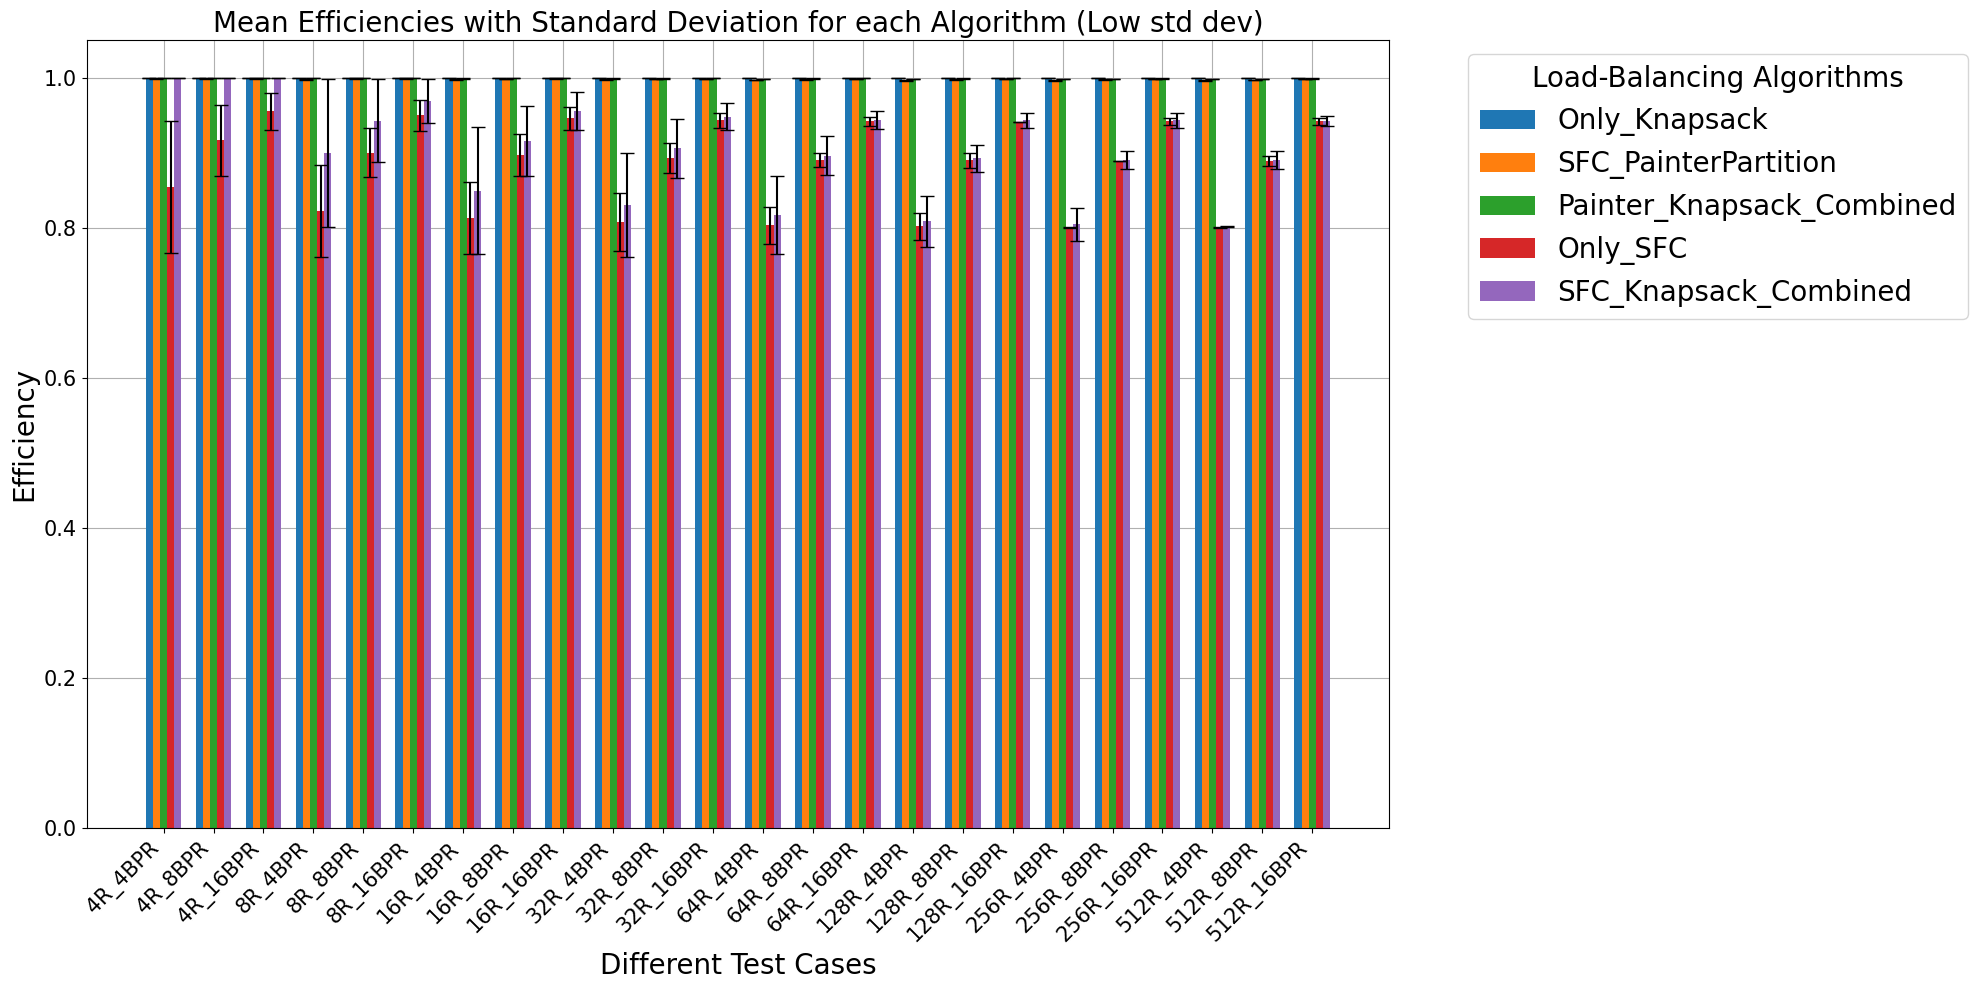

In [25]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standard Deviation for each Algorithm (Low std dev)', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

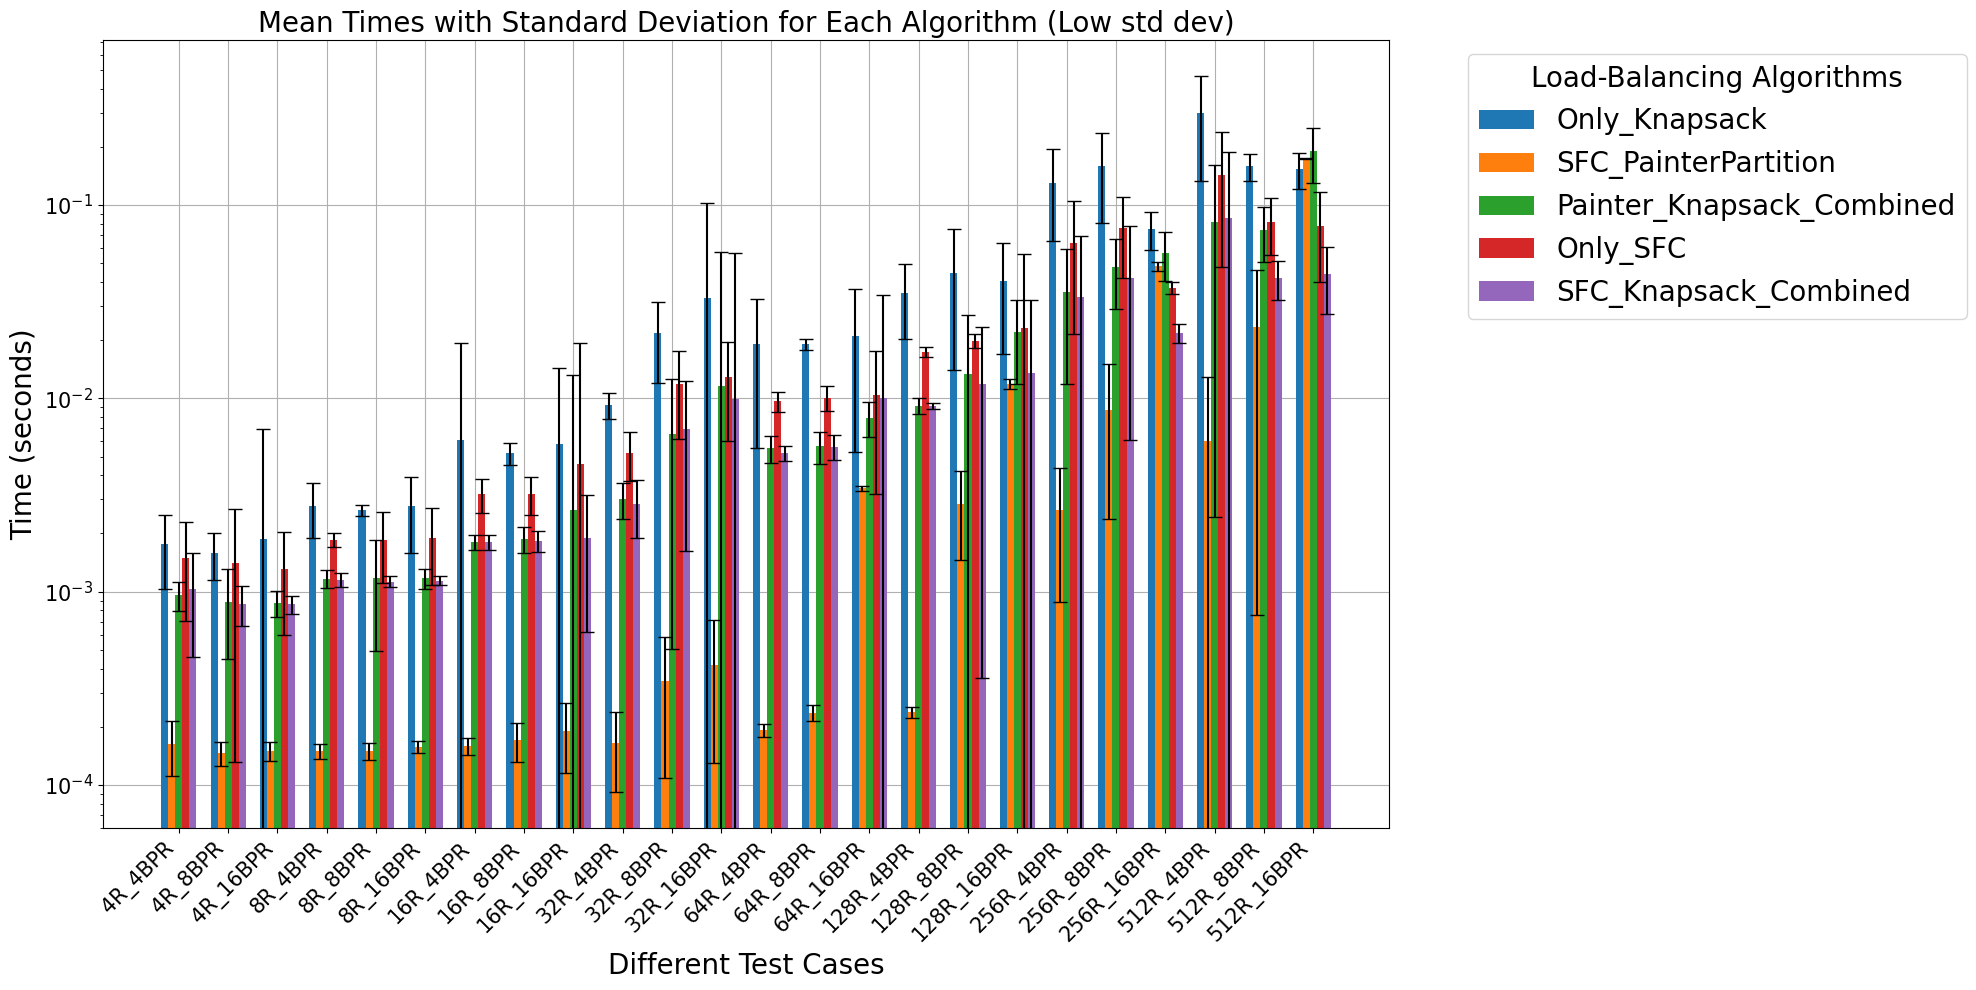

In [26]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm (Low std dev)', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/time_errorbarplot.png', dpi=600)
plt.show()

In [34]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']

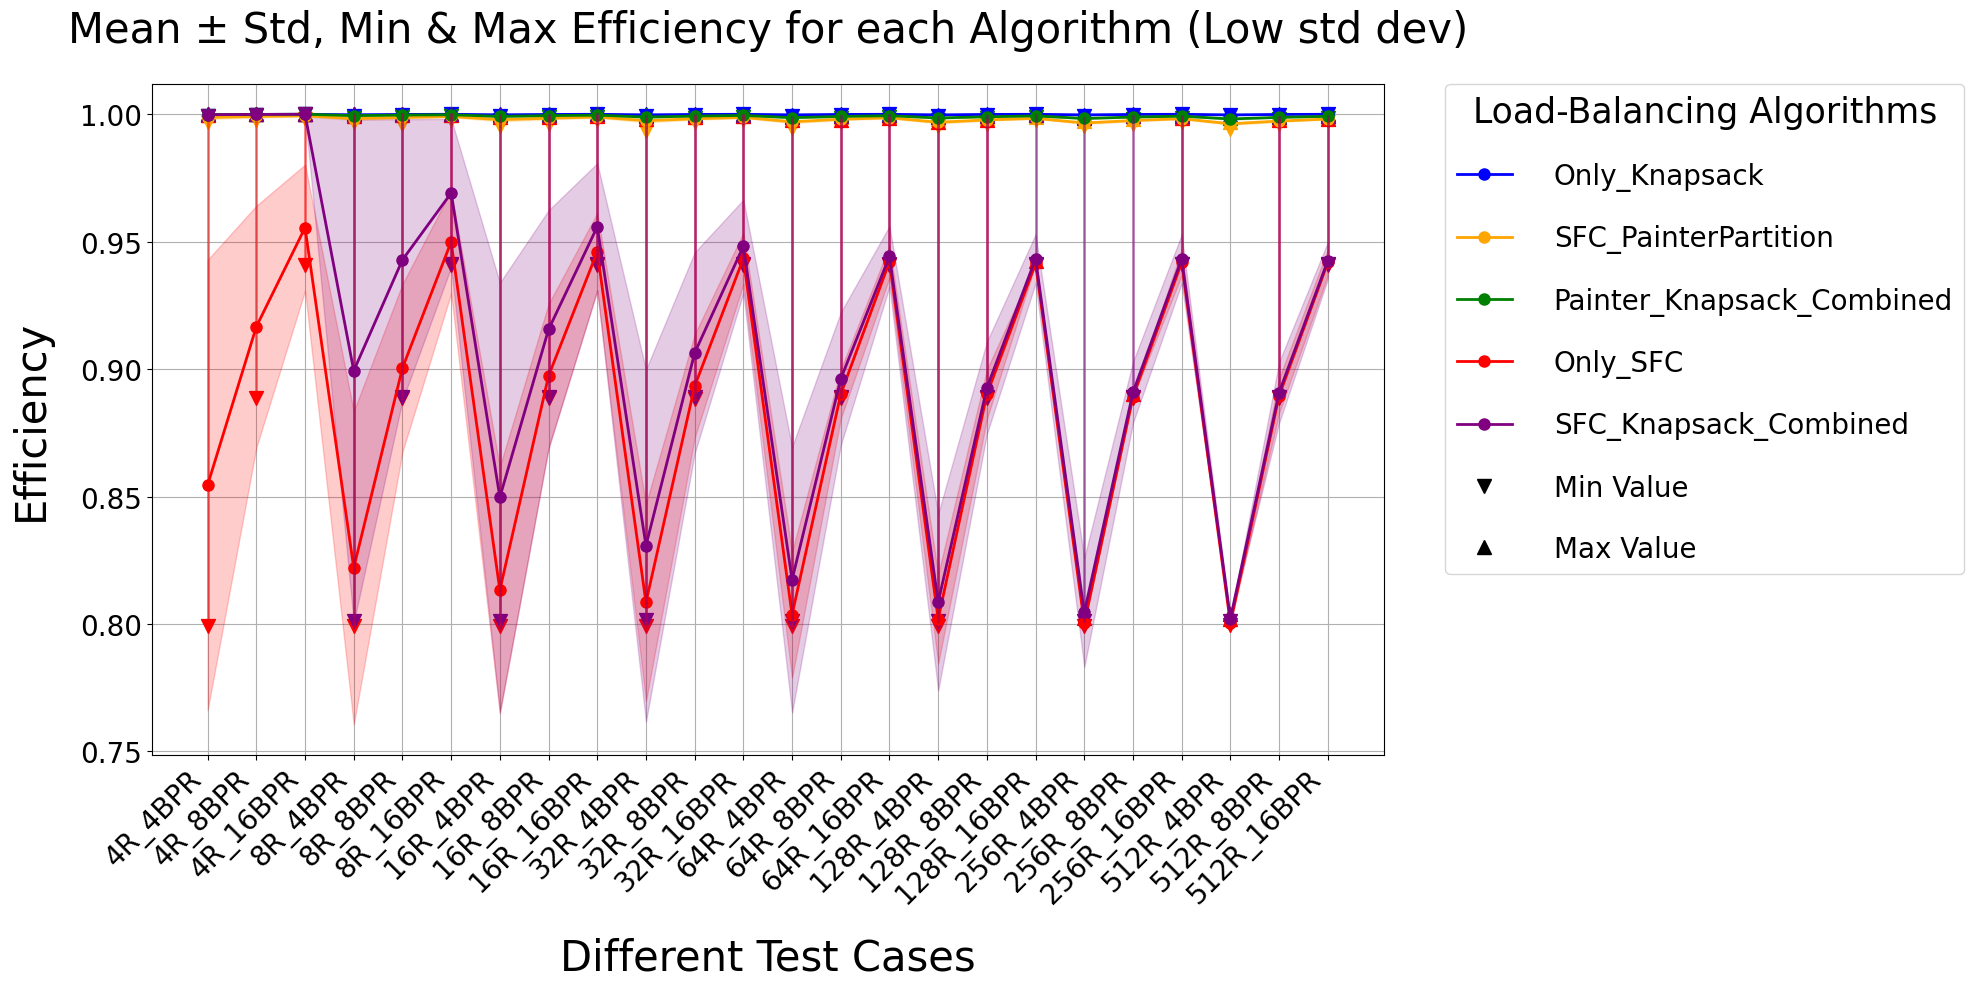

In [27]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats.png', dpi=600)
plt.show()





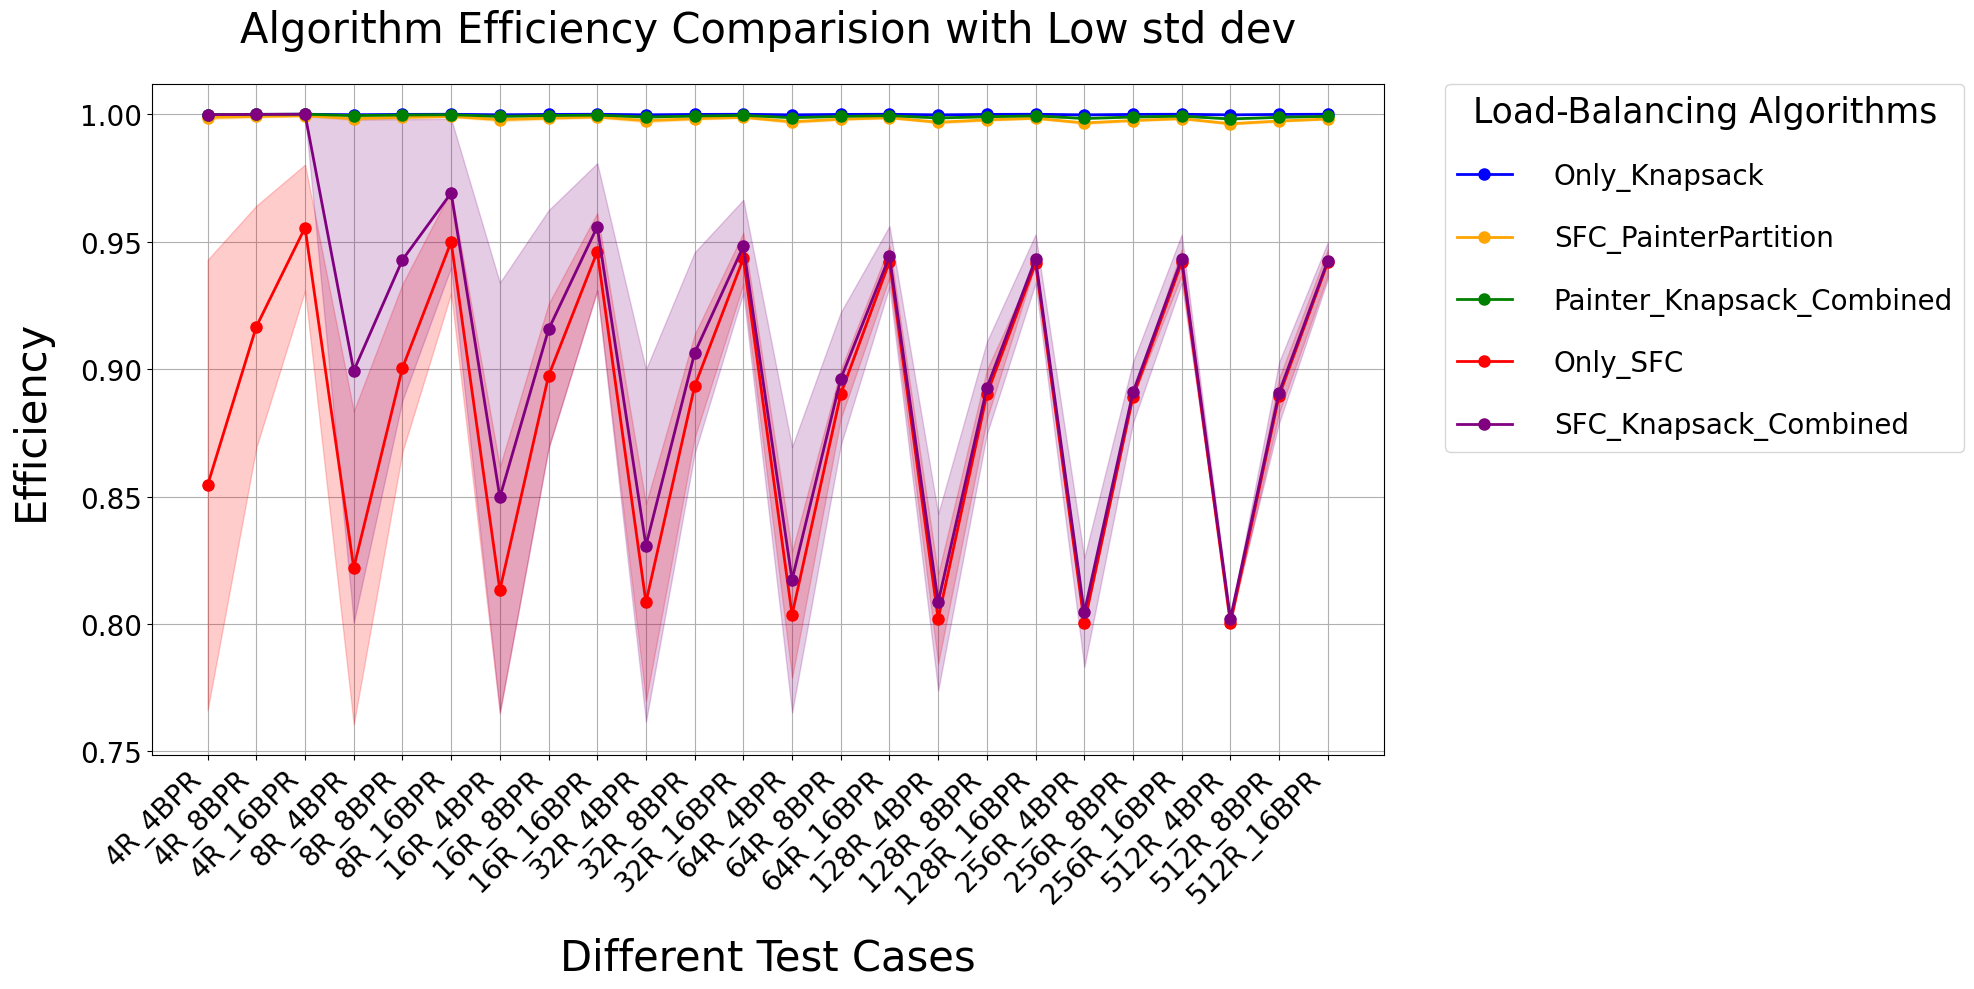

In [28]:
algorithms = [
    'Only_Knapsack', 
    'SFC_PainterPartition', 
    'Painter_Knapsack_Combined', 
    'Only_SFC', 
    'SFC_Knapsack_Combined'
]
colors = ['blue', 'orange', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_best/efficiency_all_stats_nominmax.png', dpi=600)
plt.show()

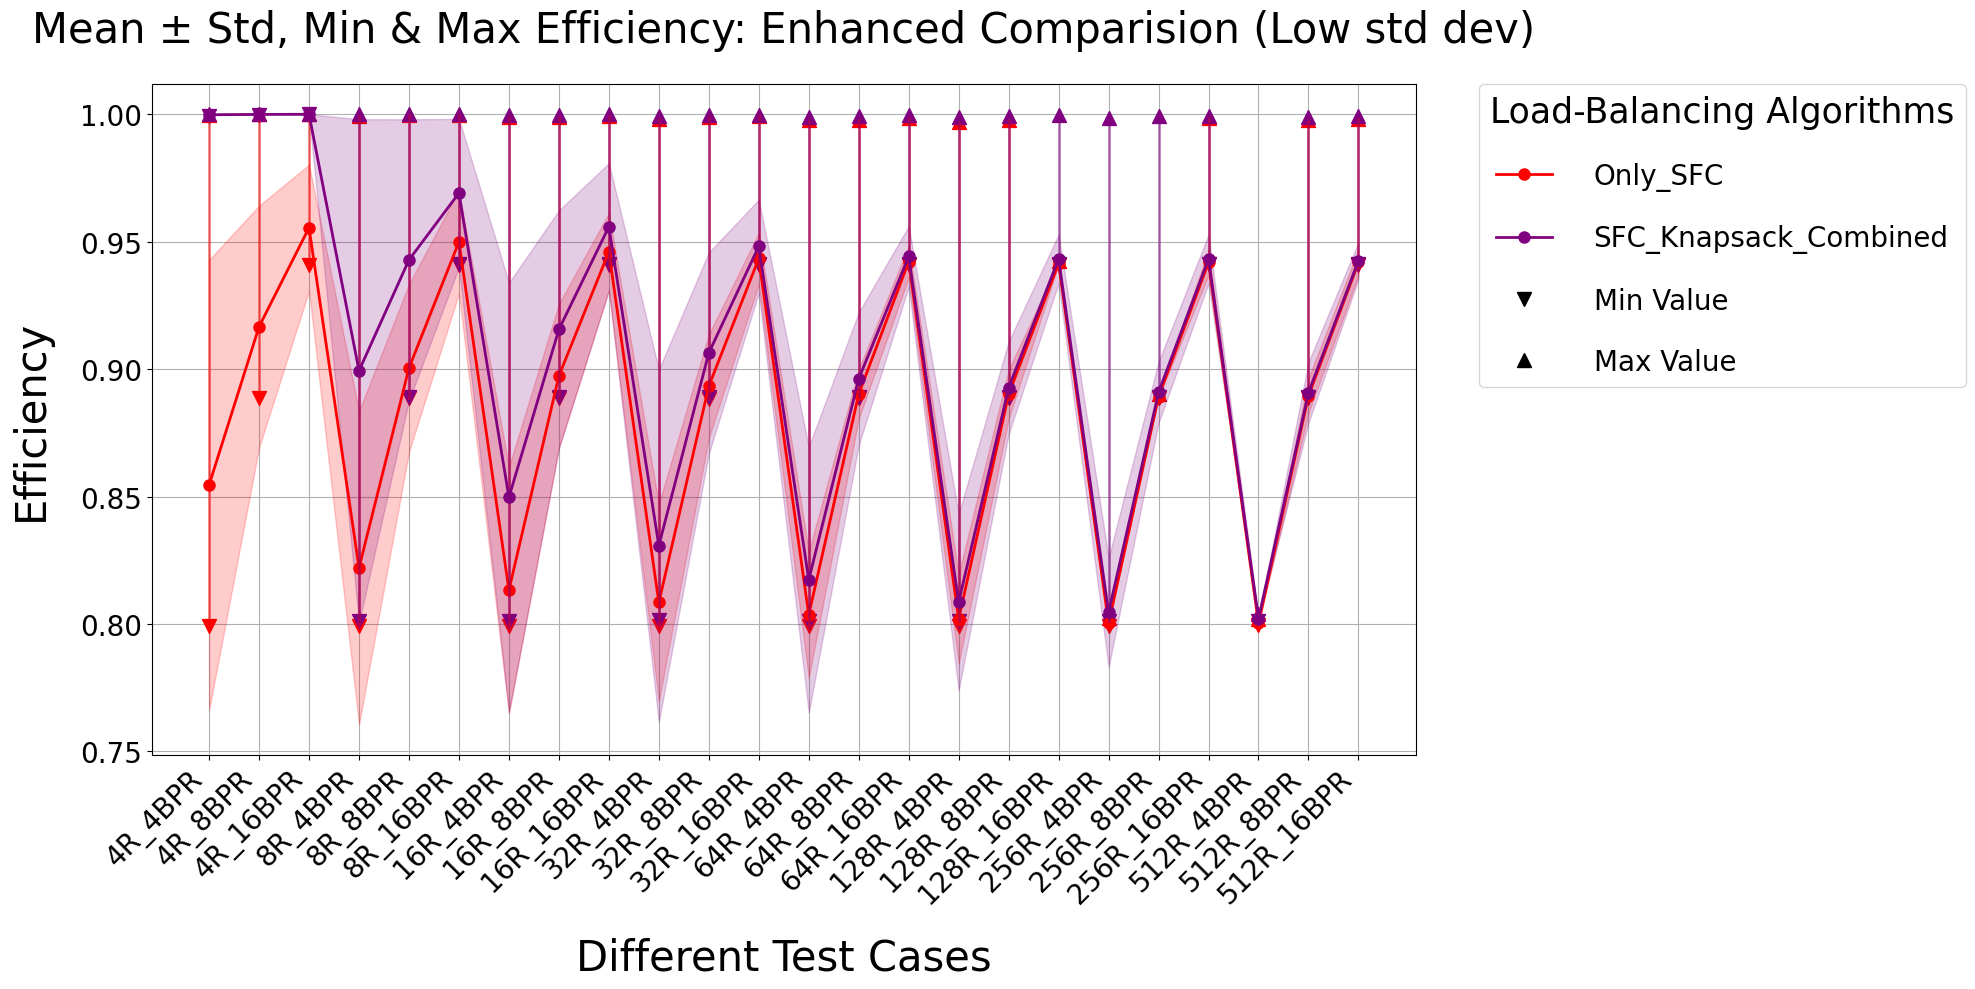

In [29]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats_2.png', dpi=600)
plt.show()



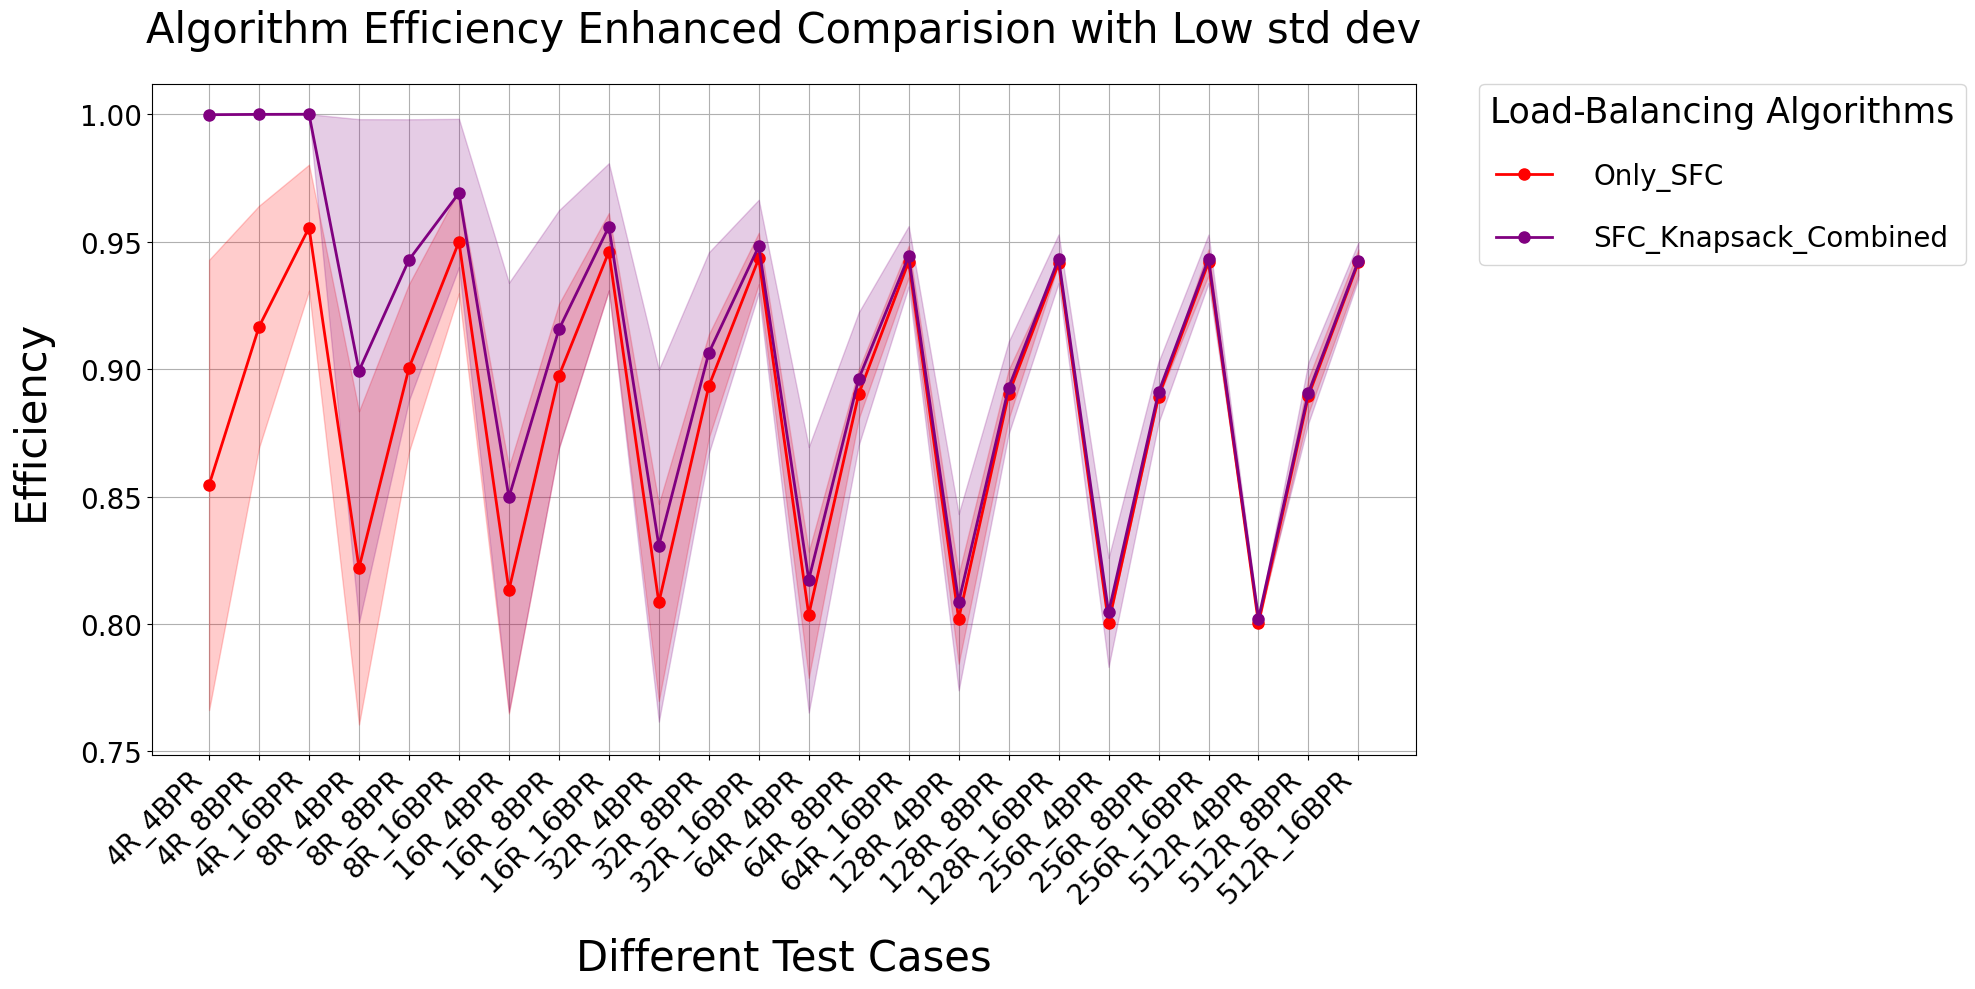

In [30]:
algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_best/efficiency_all_stats_2_nominmax.png', dpi=600)
plt.show()

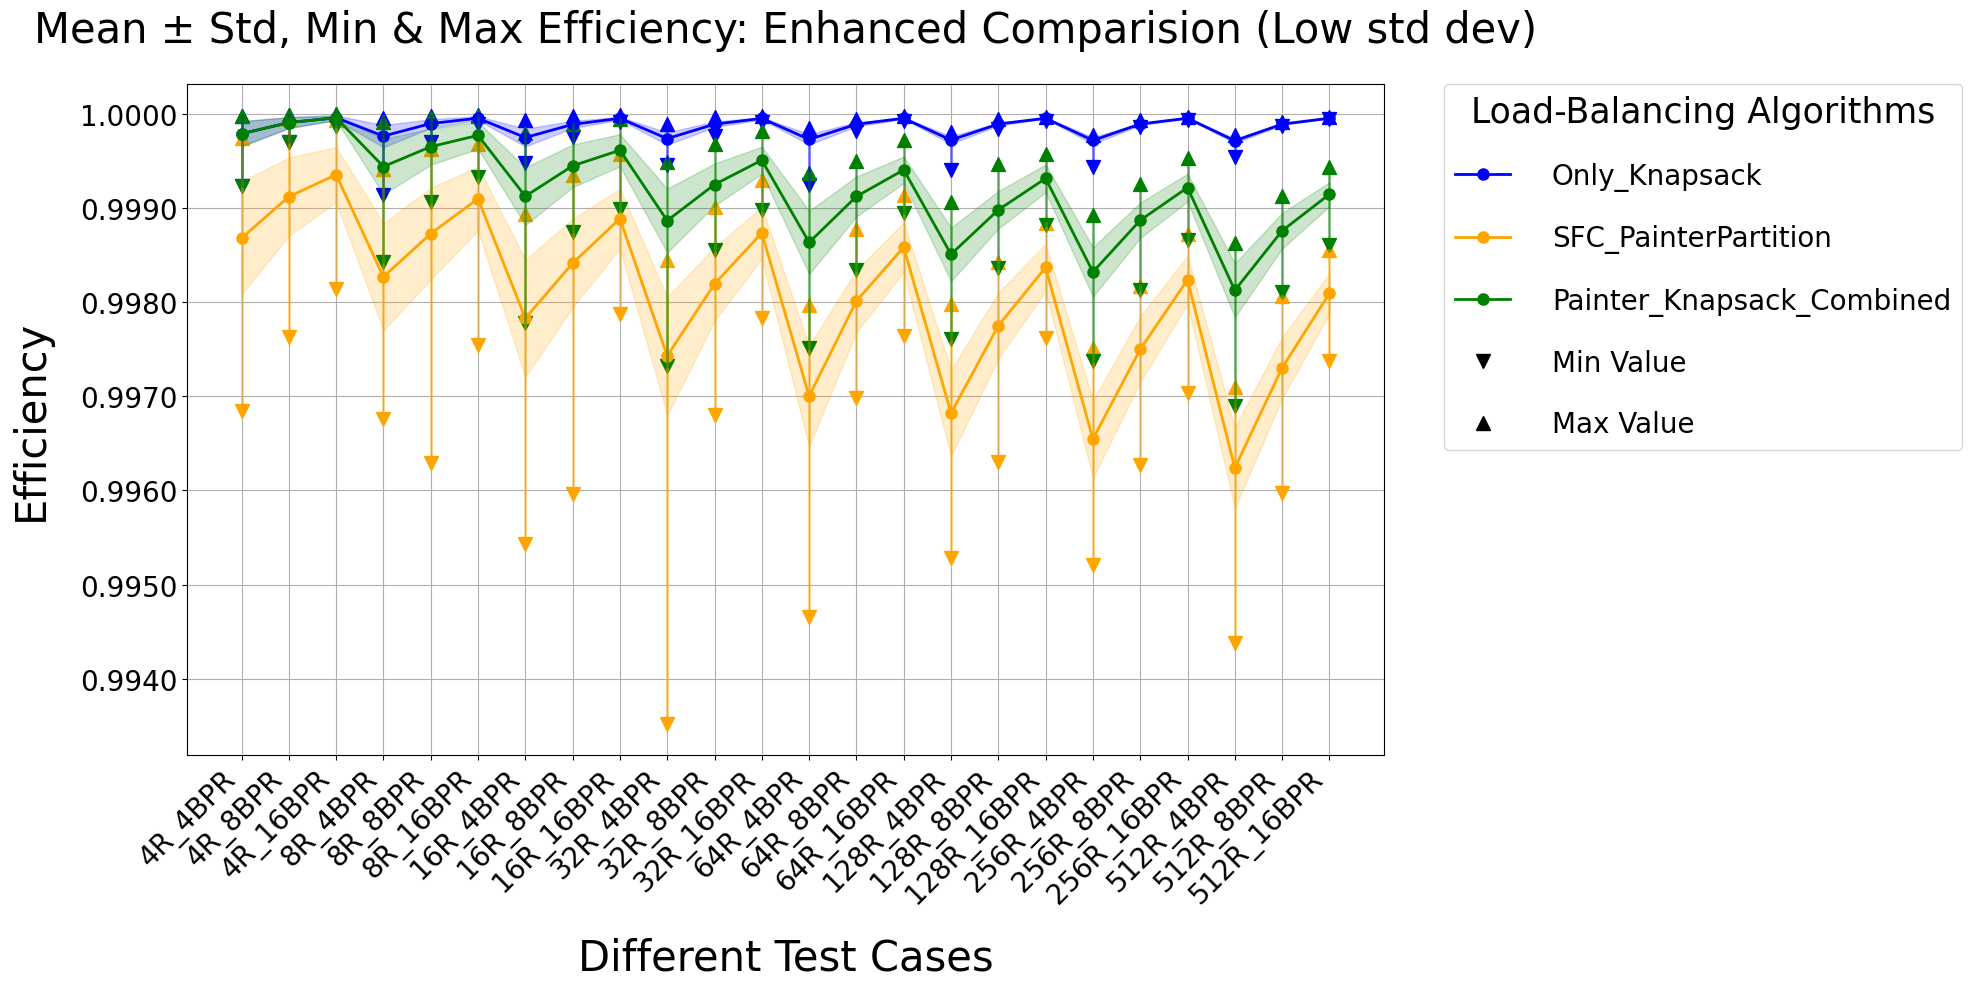

In [31]:
# algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']


algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency: Enhanced Comparision (Low std dev)', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency_all_stats_3.png', dpi=600)
plt.show()


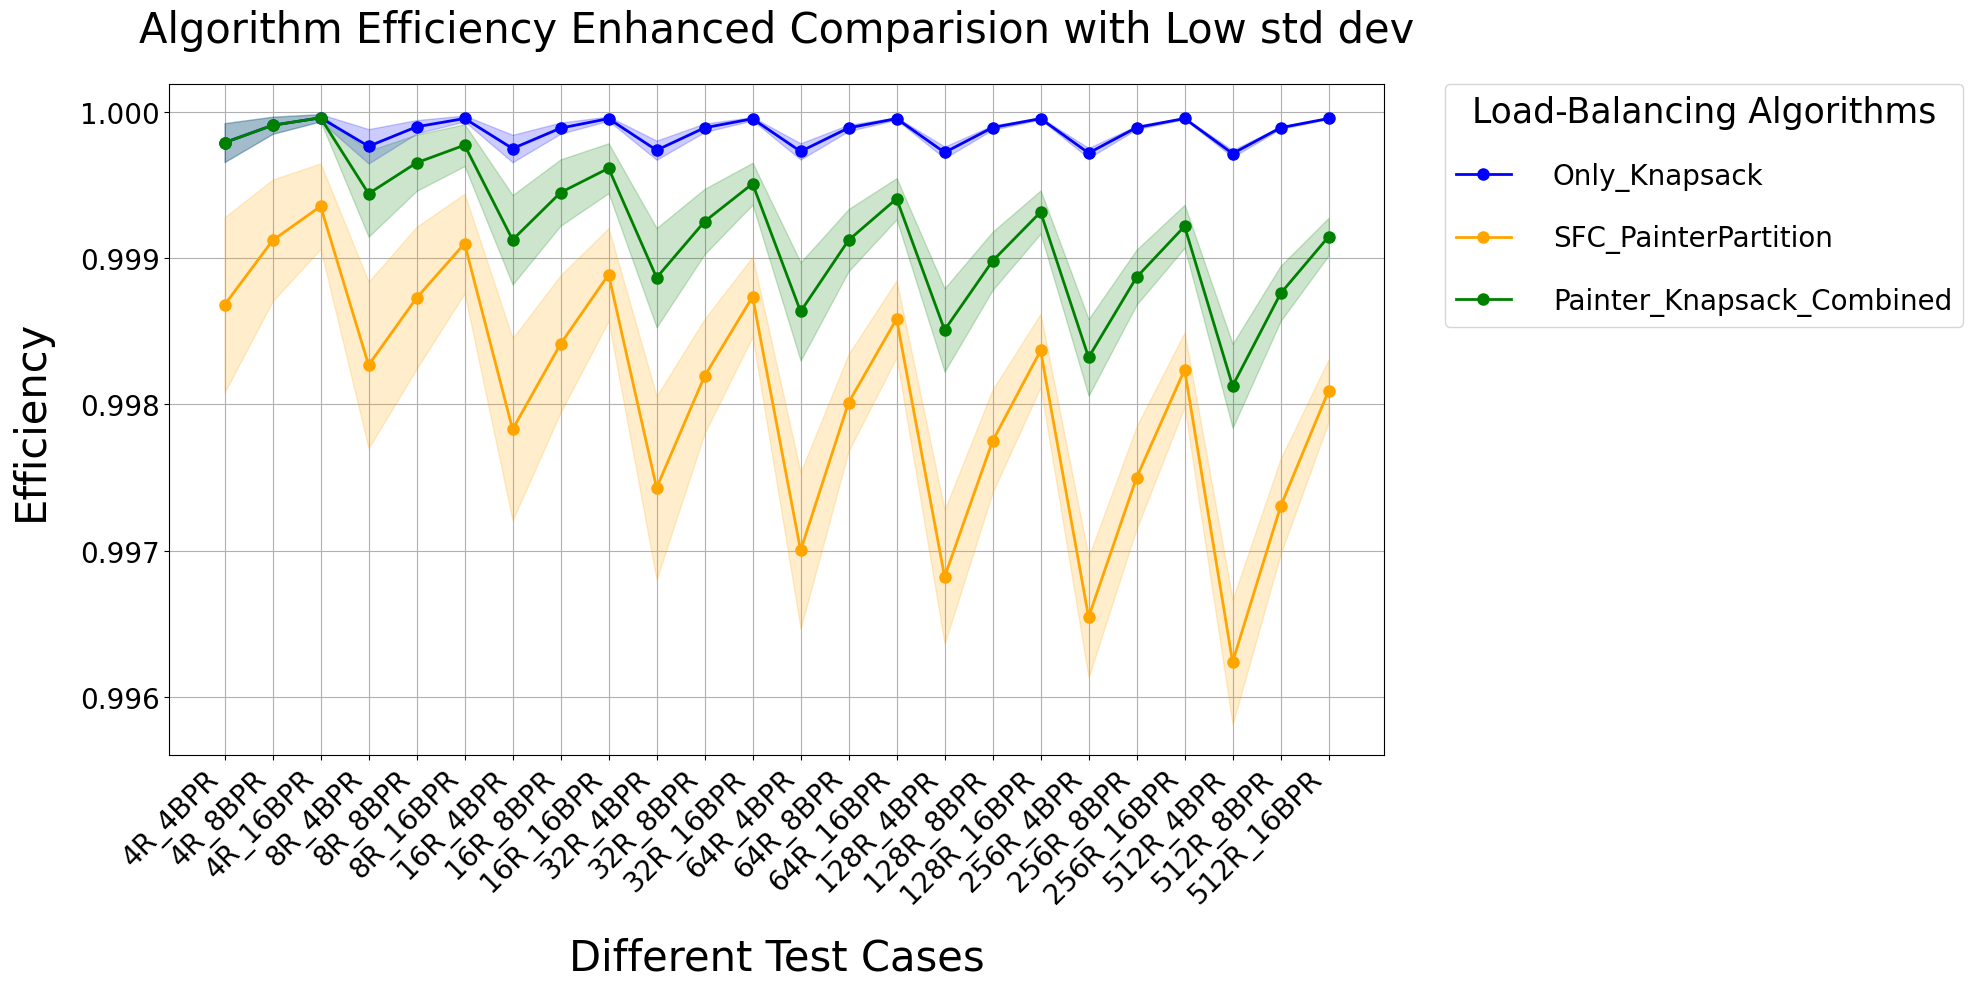

In [32]:

algorithms = ['Only_Knapsack', 'SFC_PainterPartition','Painter_Knapsack_Combined']
colors = ['blue','orange', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  
    
    mean_col = f'{alg_name}_Efficiency_mean'
    std_col  = f'{alg_name}_Efficiency_std'

    alg_color = colors[i]

    ax.plot(
        x, 
        grouped[mean_col], 
        marker='o', 
        color=alg_color, 
        label=alg_name, 
        linewidth=2, 
        markersize=8
    )

    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')

ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Algorithm Efficiency Enhanced Comparision with Low std dev',
             pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(
    title='Load-Balancing Algorithms', 
    title_fontsize=25, 
    fontsize=20,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    labelspacing=1.2, 
    handletextpad=1.5
)

ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../result/new_result/result_best/efficiency_all_stats_3_nominmax.png', dpi=600)
plt.show()

In [33]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.999789                      0.000133   
1      4R_8BPR                       0.999907                      0.000059   
2     4R_16BPR                       0.999958                      0.000025   
3      8R_4BPR                       0.999763                      0.000117   
4      8R_8BPR                       0.999897                      0.000046   
5     8R_16BPR                       0.999953                      0.000020   
6     16R_4BPR                       0.999748                      0.000094   
7     16R_8BPR                       0.999888                      0.000038   
8    16R_16BPR                       0.999952                      0.000015   
9     32R_4BPR                       0.999737                      0.000065   
10    32R_8BPR                       0.999890                      0.000029   
11   32R_16BPR                       0.999952                      0.000011   
12    64R_4BPR                       0.999728                      0.000055   
13    64R_8BPR                       0.999889                      0.000022   
14   64R_16BPR                       0.999953                      0.000008   
15   128R_4BPR                       0.999722                      0.000040   
16   128R_8BPR                       0.999892                      0.000015   
17  128R_16BPR                       0.999953                      0.000007   
18   256R_4BPR                       0.999717                      0.000035   
19   256R_8BPR                       0.999892                      0.000012   
20  256R_16BPR                       0.999954                      0.000005   
21   512R_4BPR                       0.999714                      0.000024   
22   512R_8BPR                       0.999891                      0.000008   
23  512R_16BPR                       0.999954                      0.000004   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999228                      0.999981   
1                       0.999703                      0.999992   
2                       0.999872                      0.999996   
3                       0.999139                      0.999955   
4                       0.999705                      0.999977   
5                       0.999888                      0.999992   
6                       0.999474                      0.999931   
7                       0.999758                      0.999976   
8                       0.999909                      0.999988   
9                       0.999459                      0.999894   
10                      0.999764                      0.999970   
11                      0.999918                      0.999978   
12                      0.999240                      0.999853   
13                      0.999822                      0.999948   
14                      0.999923                      0.999972   
15                      0.999402                      0.999807   
16                      0.999837                      0.999942   
17                      0.999925                      0.999969   
18                      0.999439                      0.999780   
19                      0.999858                      0.999937   
20                      0.999936                      0.999966   
21                      0.999539                      0.999771   
22                      0.999870                      0.999912   
23                      0.999942                      0.999965   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.998680                             0.000598   
1                               0.999120                             0.000416   
2                               0.999354                             0.000292   
3                               0.998269                   

In [34]:

# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     std_col = f'{alg_name}_Final_Time_std'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]
#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
#     upper_bound = grouped[mean_col] + grouped[std_col]

#     ax.fill_between(
#         x,
#         lower_bound,
#         upper_bound,
#         color=alg_color,
#         alpha=0.2
#     )
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]
#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
# ax.set_title('Mean ± Std, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_yscale('log')
# ax.set_ylim(1e-6, 0)  

# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats.png', dpi=600)
# plt.show()




In [35]:
# time = ['Only_Knapsack', 'SFC_PainterPartition', 'Painter_Knapsack_Combined', 'Only_SFC', 'SFC_Knapsack_Combined']
# colors = ['blue', 'orange', 'green', 'red', 'purple']

# fig, ax = plt.subplots(figsize=(20, 10))

# for i, alg in enumerate(time):
#     alg_name = alg  

#     mean_col = f'{alg_name}_Final_Time_mean'
#     min_col = f'{alg_name}_Final_Time_min'
#     max_col = f'{alg_name}_Final_Time_max'

#     alg_color = colors[i]

#     ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
#     for j, file_name in enumerate(grouped['File']):
#         min_val = grouped[min_col].iloc[j]
#         max_val = grouped[max_col].iloc[j]

#         ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

#         ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

#         ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


# ax.set_xticks(x)
# ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
# ax.set_xlabel('Different Test Cases (R --> Ranks, BPR --> Boxes per Rank)', fontsize=30,labelpad=20)
# ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
# ax.set_title('Mean, Min & Max Time for each Algorithm (Low std dev)', pad=30, fontsize=30)
# ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_yscale('log')
# ax.set_ylim(1e-7, 0)  


# min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
# max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

# handles, labels = ax.get_legend_handles_labels()
# handles += [min_marker, max_marker]
# labels += ['Min Value', 'Max Value']

# ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
#           bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
# ax.grid(True)
# ax.set_axisbelow(True)

# plt.tight_layout()
# # plt.savefig('../result/new_result/result_best/time_all_stats_2.png', dpi=600)
# plt.show()




In [36]:
grouped

File  Only_Knapsack_Efficiency_mean  Only_Knapsack_Efficiency_std  \
0      4R_4BPR                       0.999789                      0.000133   
1      4R_8BPR                       0.999907                      0.000059   
2     4R_16BPR                       0.999958                      0.000025   
3      8R_4BPR                       0.999763                      0.000117   
4      8R_8BPR                       0.999897                      0.000046   
5     8R_16BPR                       0.999953                      0.000020   
6     16R_4BPR                       0.999748                      0.000094   
7     16R_8BPR                       0.999888                      0.000038   
8    16R_16BPR                       0.999952                      0.000015   
9     32R_4BPR                       0.999737                      0.000065   
10    32R_8BPR                       0.999890                      0.000029   
11   32R_16BPR                       0.999952                      0.000011   
12    64R_4BPR                       0.999728                      0.000055   
13    64R_8BPR                       0.999889                      0.000022   
14   64R_16BPR                       0.999953                      0.000008   
15   128R_4BPR                       0.999722                      0.000040   
16   128R_8BPR                       0.999892                      0.000015   
17  128R_16BPR                       0.999953                      0.000007   
18   256R_4BPR                       0.999717                      0.000035   
19   256R_8BPR                       0.999892                      0.000012   
20  256R_16BPR                       0.999954                      0.000005   
21   512R_4BPR                       0.999714                      0.000024   
22   512R_8BPR                       0.999891                      0.000008   
23  512R_16BPR                       0.999954                      0.000004   

    Only_Knapsack_Efficiency_min  Only_Knapsack_Efficiency_max  \
0                       0.999228                      0.999981   
1                       0.999703                      0.999992   
2                       0.999872                      0.999996   
3                       0.999139                      0.999955   
4                       0.999705                      0.999977   
5                       0.999888                      0.999992   
6                       0.999474                      0.999931   
7                       0.999758                      0.999976   
8                       0.999909                      0.999988   
9                       0.999459                      0.999894   
10                      0.999764                      0.999970   
11                      0.999918                      0.999978   
12                      0.999240                      0.999853   
13                      0.999822                      0.999948   
14                      0.999923                      0.999972   
15                      0.999402                      0.999807   
16                      0.999837                      0.999942   
17                      0.999925                      0.999969   
18                      0.999439                      0.999780   
19                      0.999858                      0.999937   
20                      0.999936                      0.999966   
21                      0.999539                      0.999771   
22                      0.999870                      0.999912   
23                      0.999942                      0.999965   

    SFC_PainterPartition_Efficiency_mean  SFC_PainterPartition_Efficiency_std  \
0                               0.998680                             0.000598   
1                               0.999120                             0.000416   
2                               0.999354                             0.000292   
3                               0.998269                   

In [37]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'Painter_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'Painter_Knapsack_Combined_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [38]:
new_df

File  Only_Knapsack_Efficiency_mean  Only_SFC_Efficiency_mean  \
0      4R_4BPR                       0.999789                  0.854552   
1      4R_8BPR                       0.999907                  0.916648   
2     4R_16BPR                       0.999958                  0.955475   
3      8R_4BPR                       0.999763                  0.822037   
4      8R_8BPR                       0.999897                  0.900433   
5     8R_16BPR                       0.999953                  0.949914   
6     16R_4BPR                       0.999748                  0.813303   
7     16R_8BPR                       0.999888                  0.897341   
8    16R_16BPR                       0.999952                  0.946011   
9     32R_4BPR                       0.999737                  0.808463   
10    32R_8BPR                       0.999890                  0.893301   
11   32R_16BPR                       0.999952                  0.943391   
12    64R_4BPR                       0.999728                  0.803641   
13    64R_8BPR                       0.999889                  0.890190   
14   64R_16BPR                       0.999953                  0.942181   
15   128R_4BPR                       0.999722                  0.801996   
16   128R_8BPR                       0.999892                  0.890097   
17  128R_16BPR                       0.999953                  0.941450   
18   256R_4BPR                       0.999717                  0.800316   
19   256R_8BPR                       0.999892                  0.889200   
20  256R_16BPR                       0.999954                  0.941874   
21   512R_4BPR                       0.999714                  0.800277   
22   512R_8BPR                       0.999891                  0.889563   
23  512R_16BPR                       0.999954                  0.941845   

    SFC_PainterPartition_Efficiency_mean  \
0                               0.998680   
1                               0.999120   
2                               0.999354   
3                               0.998269   
4                               0.998728   
5                               0.999099   
6                               0.997829   
7                               0.998413   
8                               0.998887   
9                               0.997429   
10                              0.998193   
11                              0.998736   
12                              0.997002   
13                              0.998012   
14                              0.998584   
15                              0.996822   
16                              0.997750   
17                              0.998368   
18                              0.996546   
19                              0.997500   
20                              0.998237   
21                              0.996239   
22                              0.997303   
23                              0.998093   

    Painter_Knapsack_Combined_Efficiency_mean  \
0                                    0.999789   
1                                    0.999907   
2                                    0.999958   
3                                    0.999440   
4                                    0.999651   
5                                    0.999771   
6                                    0.999125   
7                                    0.999448   
8                                    0.999614   
9                                    0.998866   
10                                   0.999249   
11                                   0.999508   
12                                   0.998635   
13                                   0.999122   
14                                   0.999405   
15                                   0.998508   
16                                   0.998980   
17                                   0.999314   
18                                   0.998321   
19                                   0.998869   
20  

In [39]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

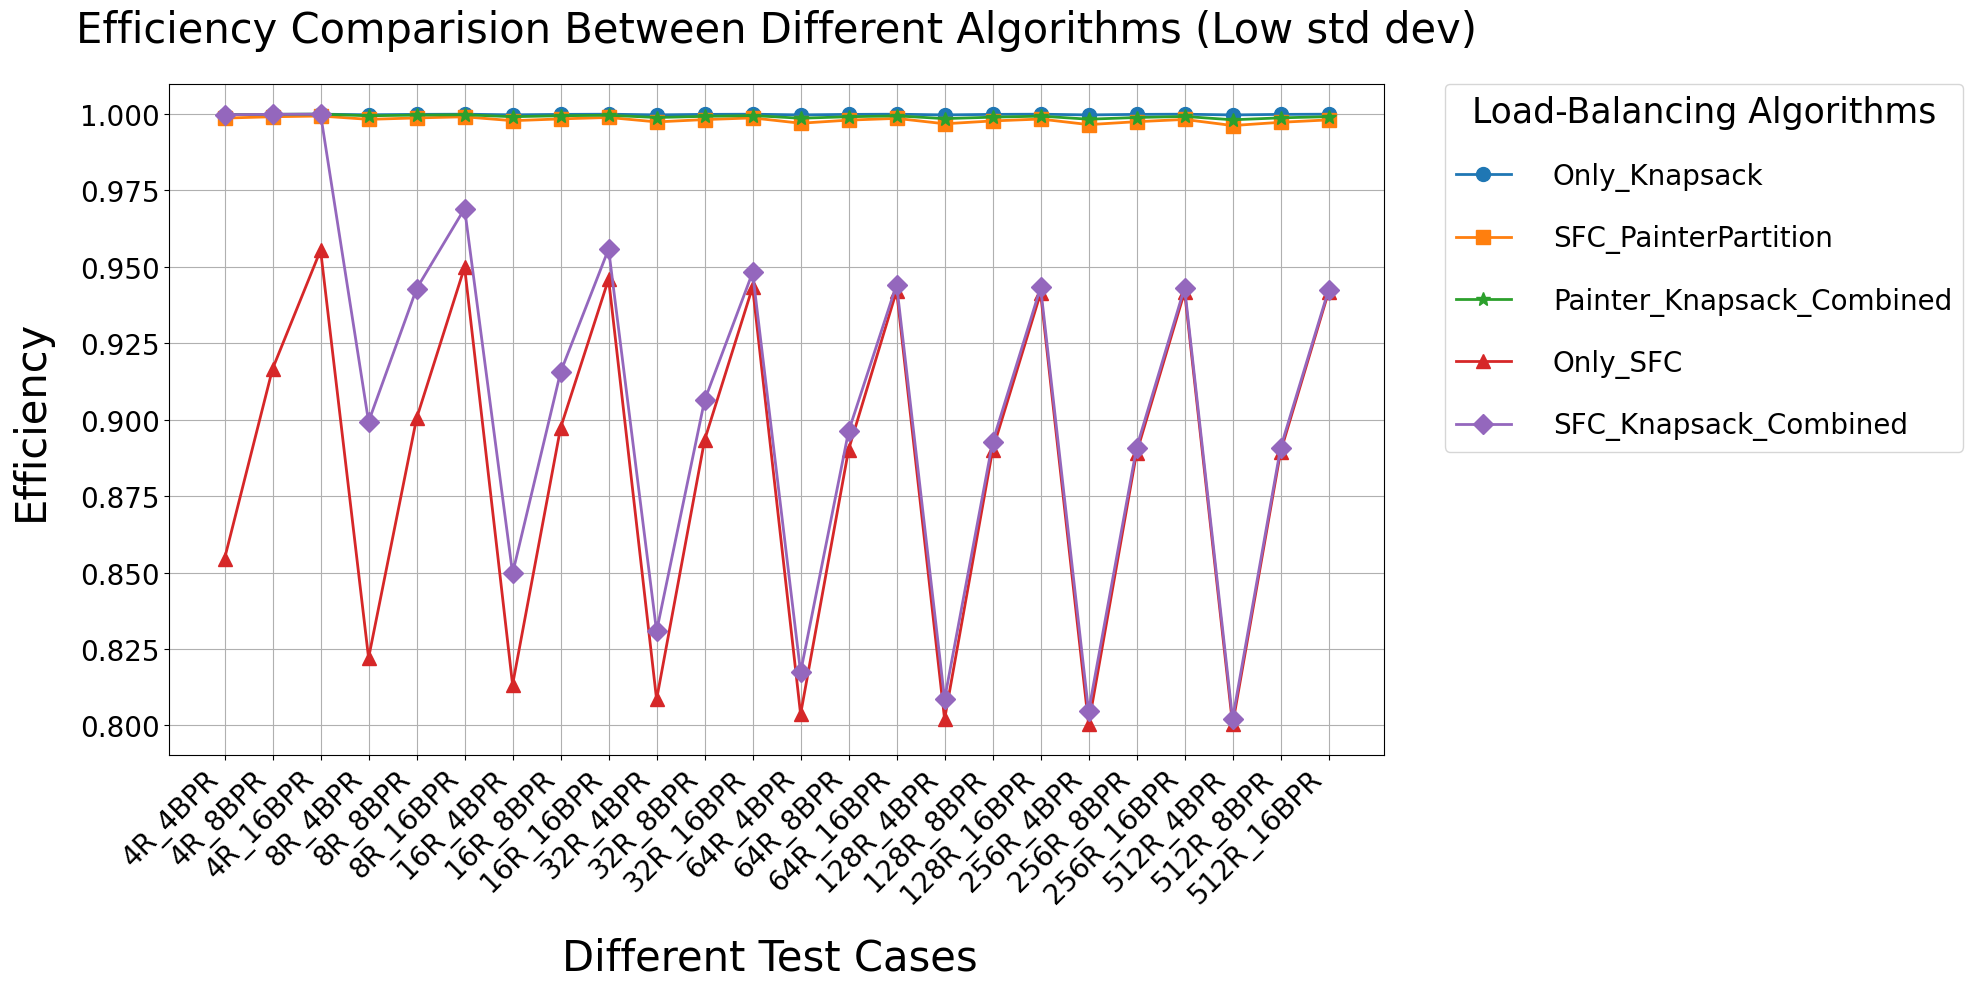

In [40]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Painter_Knapsack_Combined', 'Painter_Knapsack_Combined_Efficiency_mean', 'Painter_Knapsack_Combined_Final_Time_mean', '*'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases ', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms (Low std dev)', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
# plt.savefig('../result/new_result/result_best/efficiency.png', dpi=600)
plt.show()





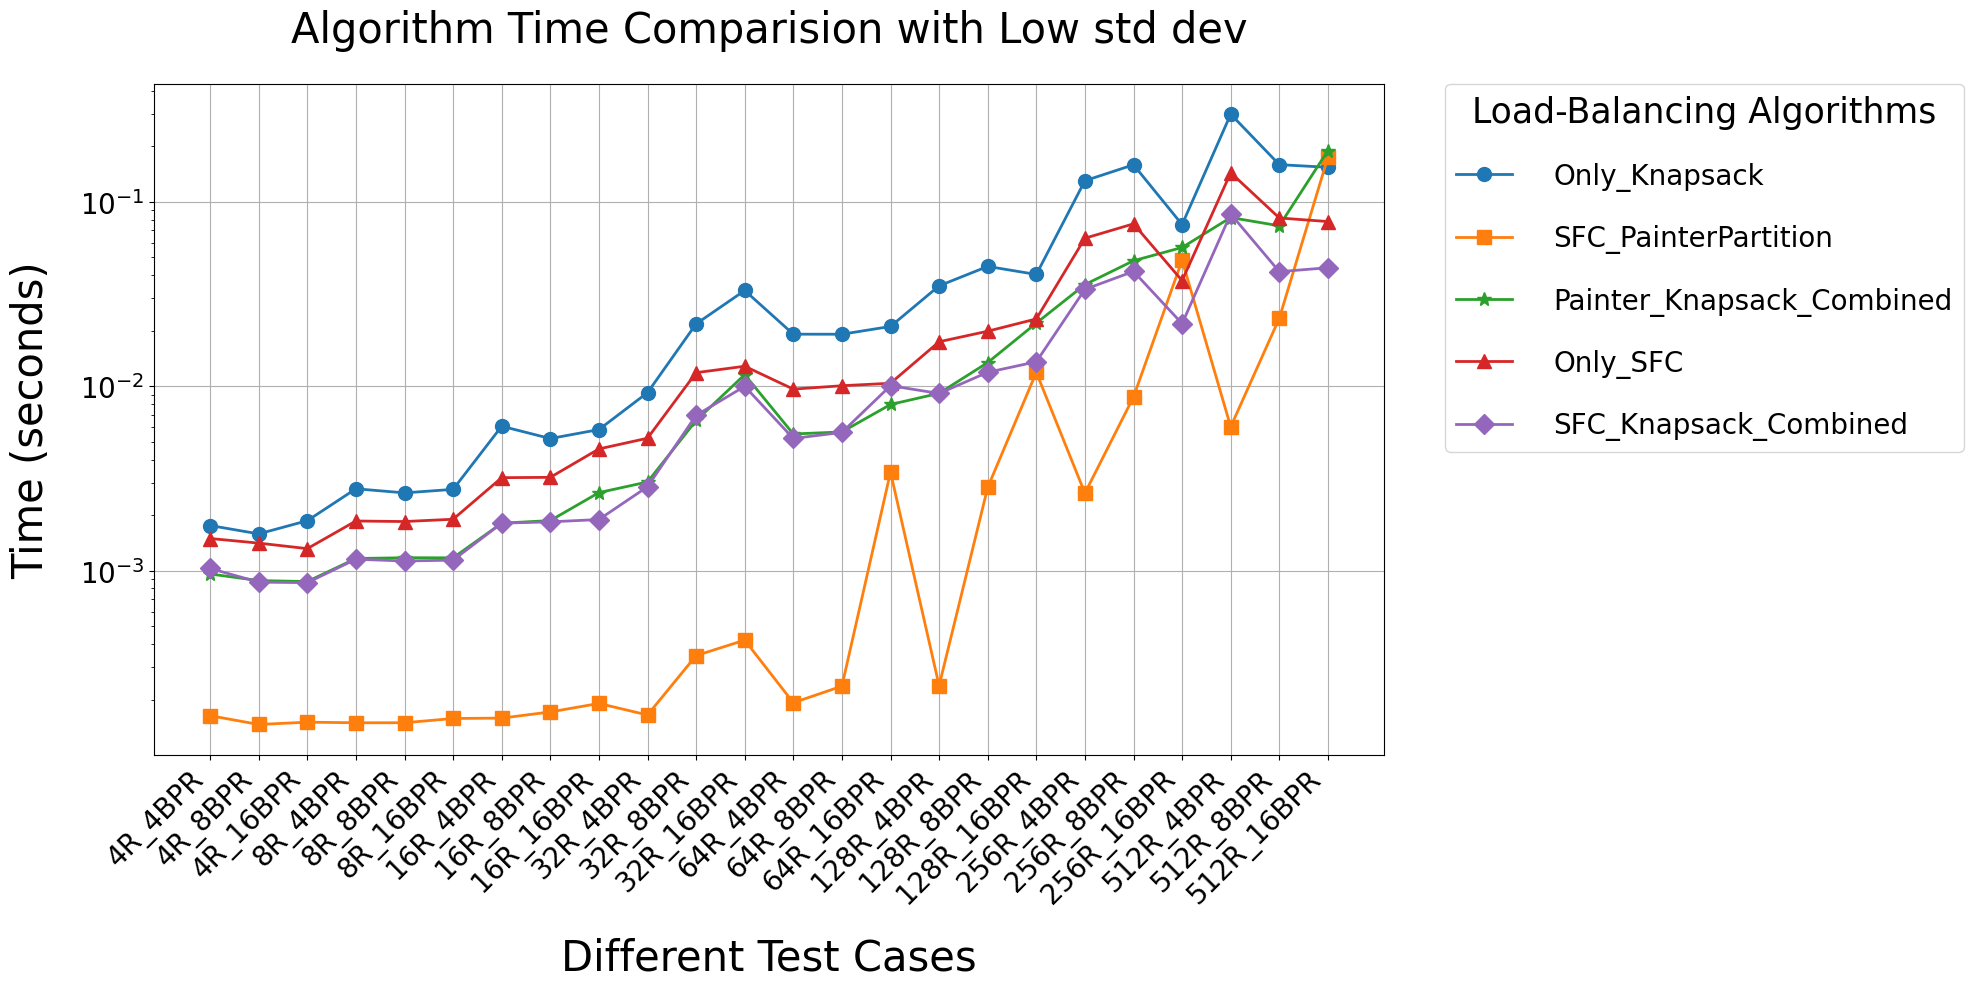

In [41]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Algorithm Time Comparision with Low std dev', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.legend(title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('../result/new_result/result_best/time.png', dpi=600)
plt.show()


